<a href="https://colab.research.google.com/github/Shahnawaz2506/IndianFashion/blob/main/CNN_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from google.colab import drive
from tensorflow.keras.preprocessing import image
import numpy as np
# This will prompt you to click on a link, sign in to your Google account, and get an authorization code.
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt
# Define paths to your dataset
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/Nykaa/training'
validation_data_dir = '/content/drive/MyDrive/Colab Notebooks/Nykaa/validation'
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/Nykaa/test'

# Define image dimensions and other parameters
img_width, img_height = 250, 300
batch_size = 32
epochs = 10

# Create data generators with data augmentation for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    width_shift_range=0.2, height_shift_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    # shuffle=False,
    # target_size=(img_width, img_height)
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Change to 'categorical' if more than two classes
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'  # Change to 'categorical' if more than two classes
)

Found 902 images belonging to 6 classes.
Found 581 images belonging to 6 classes.


In [14]:
class_counts = train_generator.classes  # This will give you an array of class indices

# Convert the class indices to a dictionary with class names and their counts
class_indices = train_generator.class_indices  # Dictionary mapping class names to class indices
class_counts_dict = {class_name: sum(class_counts == class_idx) for class_name, class_idx in class_indices.items()}
print(class_counts_dict)

{'kurtis-kurtas-and-tunics': 53, 'lehengas': 119, 'palazzos': 105, 'salwar-suits-and-sets': 295, 'sarees': 202, 'top-and-tunics': 128}


In [9]:
import os
from PIL import Image

directory = validation_data_dir

for category in os.listdir(directory):
    for filename in os.listdir(directory+"/"+category):
        file_path = os.path.join(directory+"/"+category, filename)
        try:
            img = Image.open(file_path)
            img.verify()  # Verifying if the file is readable
            img.close()
        except (IOError, SyntaxError, Image.UnidentifiedImageError):
            print(f"Problem with file: {file_path}")

[0. 0. 0. 1. 0. 0.]


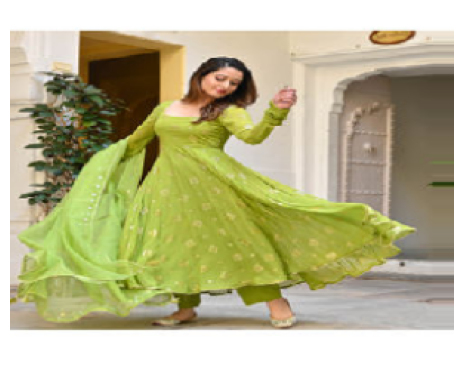

In [6]:

images, labels = train_generator.next()
print(labels[0])
# Display one image from the batch
plt.imshow(images[0])
plt.axis('off')  # Turn off axis labels
plt.show()

In [10]:

# Create a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')  # Change to number of classes if more than two
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 248, 298, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 124, 149, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 122, 147, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 61, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 59, 71, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 29, 35, 128)      

In [11]:

# Train the model using fit_generator
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


<ipython-input-11-0f47246d9f49>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
28/28 [==============================] - 105s 4s/step - loss: 2.2414 - accuracy: 0.2621 - val_loss: 1.7367 - val_accuracy: 0.2830
Epoch 2/10
28/28 [==============================] - 109s 4s/step - loss: 1.6414 - accuracy: 0.3138 - val_loss: 1.7513 - val_accuracy: 0.2847
Epoch 3/10
28/28 [==============================] - 114s 4s/step - loss: 1.6319 - accuracy: 0.3310 - val_loss: 1.6392 - val_accuracy: 0.2934
Epoch 4/10
28/28 [==============================] - 111s 4s/step - loss: 1.5979 - accuracy: 0.3529 - val_loss: 1.6354 - val_accuracy: 0.2917
Epoch 5/10
28/28 [==============================] - 113s 4s/step - loss: 1.5535 - accuracy: 0.3356 - val_loss: 1.5741 - val_accuracy: 0.3785
Epoch 6/10
28/28 [==============================] - 114s 4s/step - loss: 1.5611 - accuracy: 0.3655 - val_loss: 1.6482 - val_accuracy: 0.2951
Epoch 7/10
28/28 [==============================] - 117s 4s/step - loss: 1.5255 - accuracy: 0.3759 - val_loss: 1.5567 - val_accuracy: 0.3420
Epoch 8/10
28

In [18]:
model.save('/content/drive/MyDrive/Colab Notebooks/Nykaa/fashion_model2')


In [34]:
img_path = '/content/test2/saree3.PNG'

# Load the image and preprocess it
img = image.load_img(img_path, target_size=(250, 300))  # Adjust the target size as needed
img_array = image.img_to_array(img)

img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize the image

# Replace 'model' with your trained model
# Assume you have a model that you're interested in visualizing the layers
layer_outputs = [layer.output for layer in model.layers[:5]]  # Choose the layers you want to visualize

activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_array)

layer_names = [layer.name for layer in model.layers[:5]]  # Names of the layers you're visualizing

1/1 [==============================] - 1s 826ms/step


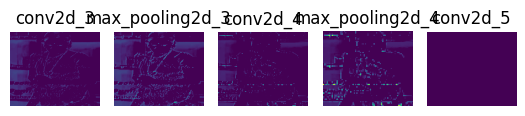

In [35]:
for i in range(len(activations)):
    plt.subplot(1, len(layer_names) + 1, i + 2)
    plt.imshow(activations[i][0, :, :, 0], cmap='viridis')  # Visualize only the first channel
    plt.title(layer_names[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [36]:
s=model.predict(img_array)

1/1 [==============================] - 0s 473ms/step


In [16]:
import pandas as pd
predictions = model.predict_generator(validation_generator)
filenames = validation_generator.filenames
true_labels = validation_generator.classes

# Get class labels
labels = list(validation_generator.class_indices.keys())

# Create a DataFrame with filenames, true labels, and predicted probabilities
results = pd.DataFrame(predictions, columns=labels)
results['Filename'] = filenames
results['True_Label'] = true_labels

# Optional: Get the predicted label based on the highest probability
results['Predicted_Label'] = results[labels].idxmax(axis=1)


<ipython-input-16-45b1497c6e48>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(validation_generator)


In [17]:
results.to_csv('results_fashion.csv',index=False)

In [32]:
5.3866702e-01

0.53866702